In [0]:
import numpy as np # calculations
import pandas as pd #data analysis
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


In [0]:
# Read the Training 
train = pd.read_csv("/content/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
train.shape

(891, 12)

In [0]:
#Read Test Data
test = pd.read_csv("/content/test.csv")
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [0]:
test.shape

(418, 11)

In [0]:
data = train.append(test)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [0]:
data.shape

(1309, 12)

In [0]:
passenger_id = test['PassengerId']

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.set_index(['PassengerId'],inplace = True)
test.set_index(['PassengerId'],inplace = True)

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [0]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [0]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [0]:
test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [0]:
import missingno as mn

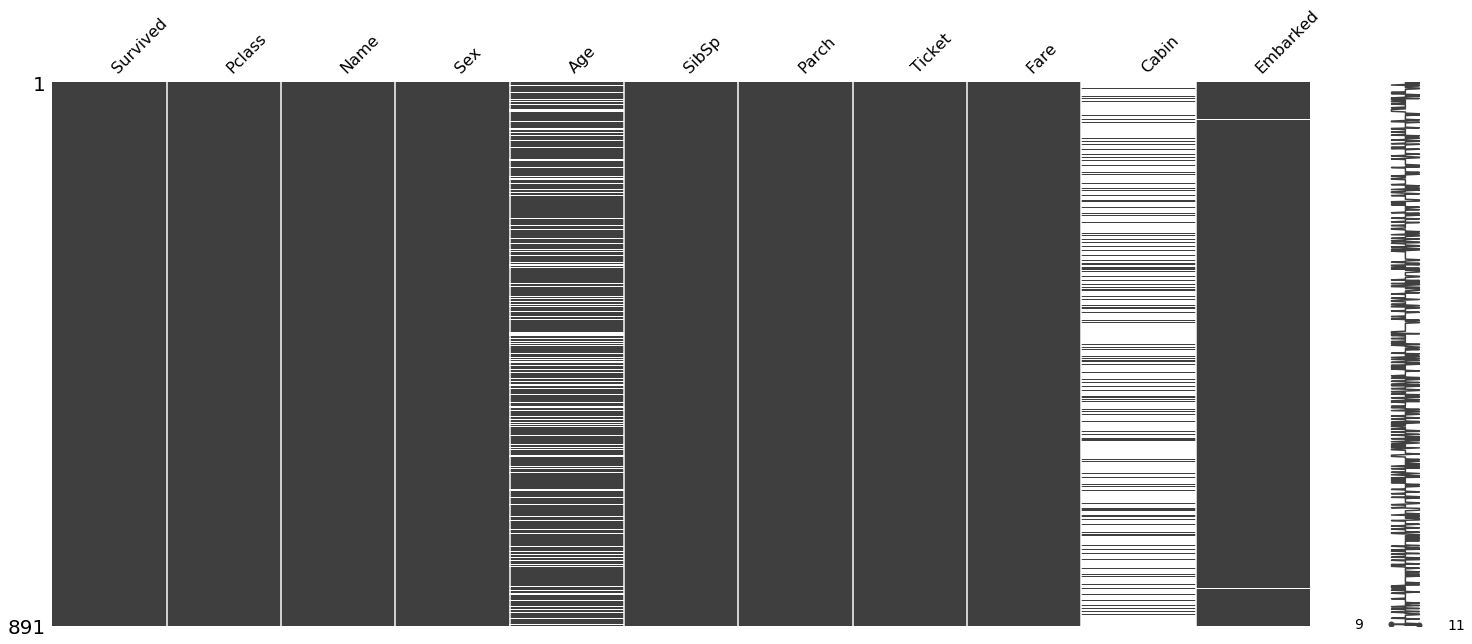

In [0]:
mn.matrix(train)

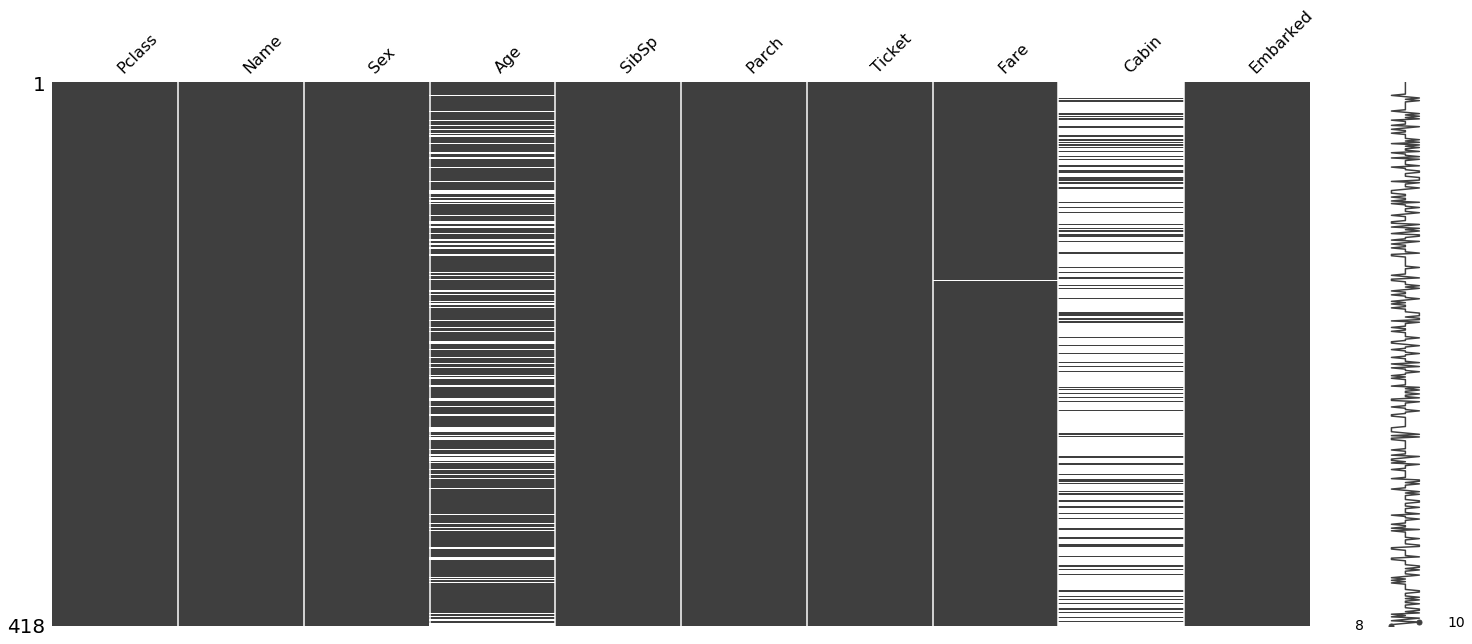

In [0]:
mn.matrix(test)

In [0]:
from sklearn.preprocessing import Imputer

In [0]:
imp = Imputer(missing_values = 'NaN',strategy = 'median',axis = 1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
Age2 = imp.fit_transform(train['Age'].values.reshape(1,-1))
Age2

array([[22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
        14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
        31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
        19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
        28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
        28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
        65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
         4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
        21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
        29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
        29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
        34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
        38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
        29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
      

In [0]:
Age2 = Age2.T

In [0]:
Age2

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [0]:
train['Age2'] = Age2

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [0]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age2          0
dtype: int64

In [0]:
Age_test = imp.fit_transform(test['Age'].values.reshape(1,-1))


In [0]:
Age_test = Age_test.T

In [0]:
test['Age_test'] = Age_test

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [0]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [0]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
test.Pclass.value_counts()


3    218
1    107
2     93
Name: Pclass, dtype: int64

In [0]:
train.Embarked.fillna('S',inplace = True)

In [0]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Age2          0
dtype: int64

In [0]:
test.Fare.fillna(test.Fare.mean,inplace = True)

In [0]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Age_test      0
dtype: int64

In [0]:
train.drop(['Age','Cabin'],axis=1,inplace=True)

In [0]:
test.drop(['Age','Cabin'],axis = 1,inplace = True)

In [0]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age_test    0
dtype: int64

In [0]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age2        0
dtype: int64

In [0]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [0]:
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0


In [0]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
train['Sex'] = train.Sex.apply(lambda x:0 if x == 'female' else 1)

In [0]:
train.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C,38.0
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,S,35.0
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,S,35.0
6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,Q,28.0
7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,S,54.0
8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,21.0750,S,2.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,11.1333,S,27.0


In [0]:
test.head(10)

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0
897,3,"Svensson, Mr. Johan Cervin",male,0,0,7538,9.225,S,14.0
898,3,"Connolly, Miss. Kate",female,0,0,330972,7.6292,Q,30.0
899,2,"Caldwell, Mr. Albert Francis",male,1,1,248738,29,S,26.0
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,0,0,2657,7.2292,C,18.0


In [0]:
test.head()


,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7,S,47.0
894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0
895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0


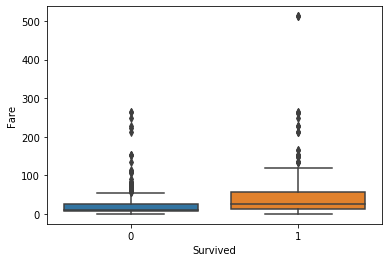

In [0]:
sns.boxplot(x = 'Survived', y = 'Fare',data = train)

In [0]:
train['Fare'] = train[train['Fare']<= 400]

In [0]:
train.describe()

,Survived,Pclass,Sex,SibSp,Parch,Age2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,29.361582
std,0.486592,0.836071,0.477990,1.102743,0.806057,13.019697
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,22.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,35.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,80.000000


In [0]:
train.groupby('Survived').mean()

,Pclass,Sex,SibSp,Parch,Age2
Survived,,,,,
0,2.531876,0.852459,0.553734,0.329690,30.028233
1,1.950292,0.318713,0.473684,0.464912,28.291433


In [0]:
train.groupby('Sex').mean()

,Survived,Pclass,SibSp,Parch,Age2
Sex,,,,,
0,0.742038,2.159236,0.694268,0.649682,27.929936
1,0.188908,2.389948,0.429809,0.235702,30.140676


In [0]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Age2
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.064910
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.339898
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.081163
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,-0.233296
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,-0.172482
Age2,-0.064910,-0.339898,0.081163,-0.233296,-0.172482,1.000000


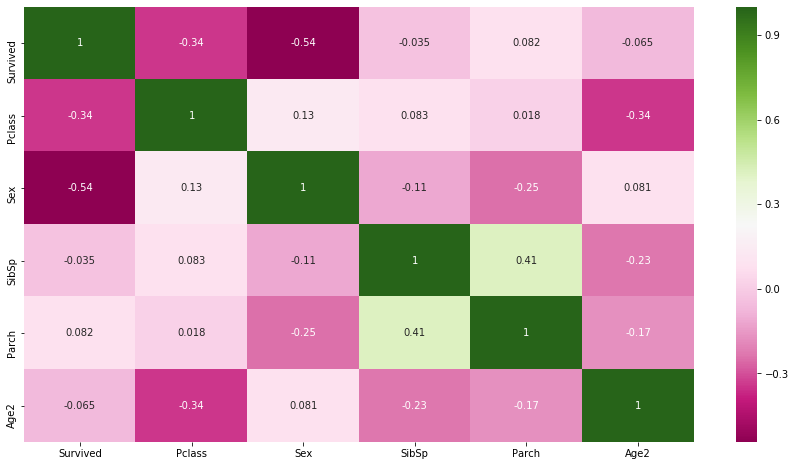

In [0]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(),annot=True,cmap='PiYG')

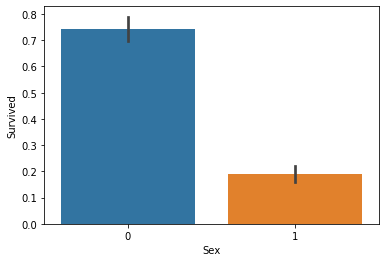

In [0]:
sns.barplot(x = 'Sex',y = 'Survived',data = train )

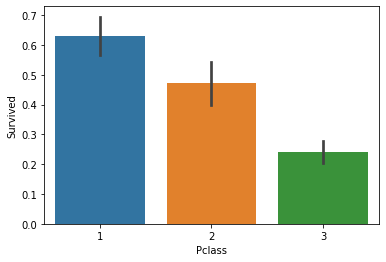

In [0]:
sns.barplot(x = 'Pclass',y = 'Survived',data = train)

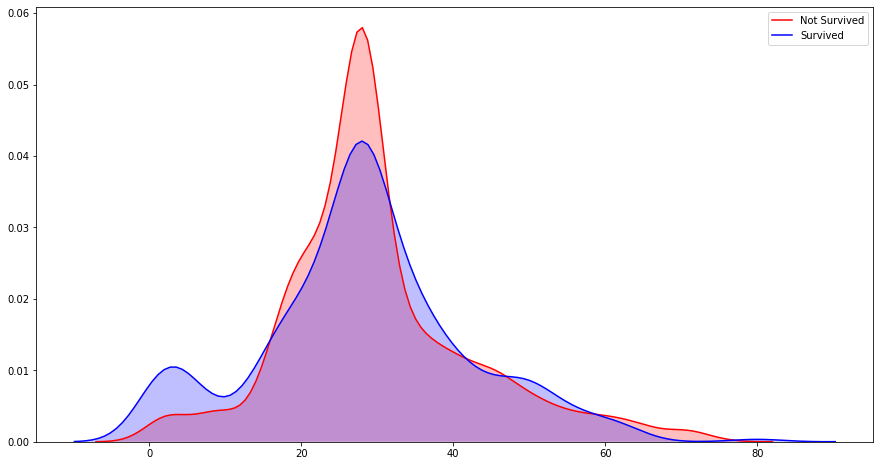

In [0]:
plt.subplots(figsize = (15,8))
sns.kdeplot(train.loc[(train['Survived']== 0),'Age2'],color = 'r',shade=True,Label = 'Not Survived')
sns.kdeplot(train.loc[(train['Survived']== 1),'Age2'],color = 'b',shade=True,Label = 'Survived')

In [0]:
train['family_size'] = train['SibSp']+train['Parch']+1
train.family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [0]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,22.0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,C,38.0,2
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1,S,26.0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,S,35.0,2
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0,S,35.0,1


In [0]:
def family_group(size):
  a = ''
  if(size <= 1):
    a = 'alone'
  elif(size <= 4):
    a = 'small'
  else:
    a = 'large'
  return a
train['family_group'] = train.family_size.map(family_group)
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,22.0,2,small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,C,38.0,2,small
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1,S,26.0,1,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,S,35.0,2,small
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0,S,35.0,1,alone


In [0]:
def age_group(age):
  a = ''
  if (age <= 1):
    a = 'Infant'
  elif (age <=4):
    a = 'toddler'
  elif (age <= 14):
    a = 'Child'
  elif (age < 20):
    a = 'Teenager'
  elif (age <= 25):
    a = 'Young Adult'
  elif (age <= 40):
    a = 'Adult'
  elif (age <= 55):
    a = 'Middle Age'
  else:
    a = 'Old'
  return a
train['age_group'] = train.Age2.map(age_group)                  

In [0]:
train.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,22.0,2,small,Young Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,C,38.0,2,small,Adult
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1,S,26.0,1,alone,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,S,35.0,2,small,Adult
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0,S,35.0,1,alone,Adult
6,0,3,"Moran, Mr. James",1,0,0,330877,0,Q,28.0,1,alone,Adult
7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,0,S,54.0,1,alone,Middle Age
8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,0,S,2.0,5,large,toddler
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,1,S,27.0,3,small,Adult


In [0]:
train['Fare_Per_Person'] = train['Fare']/train['family_size']

In [0]:
train.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group,Fare_Per_Person
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,22.0,2,small,Young Adult,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,C,38.0,2,small,Adult,0.5
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1,S,26.0,1,alone,Adult,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,S,35.0,2,small,Adult,0.5
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0,S,35.0,1,alone,Adult,0
6,0,3,"Moran, Mr. James",1,0,0,330877,0,Q,28.0,1,alone,Adult,0
7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,0,S,54.0,1,alone,Middle Age,0
8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,0,S,2.0,5,large,toddler,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,1,S,27.0,3,small,Adult,0.333333


In [0]:
def fare_group(fare):
  a = ''
  if (fare <= 4):
    a = 'Very Low'
  elif (fare <= 10):
    a = 'Low'
  elif (fare <= 20):
    a = 'Mid'
  elif (fare <= 45):
    a = 'High'
  else:
    a = 'Very High'
  return a
train['Fare_Group'] = train.Fare_Per_Person.map(fare_group)  

In [0]:
train.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age2,family_size,family_group,age_group,Fare_Per_Person,Fare_Group
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,22.0,2,small,Young Adult,0,Very Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,C,38.0,2,small,Adult,0.5,Very Low
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1,S,26.0,1,alone,Adult,1,Very Low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,S,35.0,2,small,Adult,0.5,Very Low
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0,S,35.0,1,alone,Adult,0,Very Low
6,0,3,"Moran, Mr. James",1,0,0,330877,0,Q,28.0,1,alone,Adult,0,Very Low
7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,0,S,54.0,1,alone,Middle Age,0,Very Low
8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,0,S,2.0,5,large,toddler,0,Very Low
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,1,S,27.0,3,small,Adult,0.333333,Very Low


In [0]:
train = pd.get_dummies(train,columns=['Embarked','family_group','age_group','Fare_Group'],drop_first=True)

In [0]:
train.head(10)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age2,family_size,Fare_Per_Person,Embarked_Q,Embarked_S,family_group_large,family_group_small,age_group_Child,age_group_Infant,age_group_Middle Age,age_group_Old,age_group_Teenager,age_group_Young Adult,age_group_toddler,Fare_Group_Very Low
PassengerId,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,22.0,2,0,0,1,0,1,0,0,0,0,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,1,38.0,2,0.5,0,0,0,1,0,0,0,0,0,0,0,1
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1,26.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,1,35.0,2,0.5,0,1,0,1,0,0,0,0,0,0,0,1
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,0,35.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
6,0,3,"Moran, Mr. James",1,0,0,330877,0,28.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,0,54.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,0,2.0,5,0,0,1,1,0,0,0,0,0,0,0,1,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,1,27.0,3,0.333333,0,1,0,1,0,0,0,0,0,0,0,1


In [0]:
train.shape

(891, 23)

In [0]:
train.drop(['Ticket','Name','Fare','Age2','Fare_Per_Person','family_size'],axis=1,inplace = True)

In [0]:
train.shape

(891, 17)

In [0]:
X = train.drop('Survived',1)
Y = train['Survived']

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

Classifiers = [ 
               KNeighborsClassifier(3),
               svm.SVC(probability = True),
               DecisionTreeClassifier(),
               XGBClassifier(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               GaussianNB(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(),
               LogisticRegression()
]

log_cols = ["Classifier","Accuracy"]
log = pd.DataFrame(columns=log_cols)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

SSplit = StratifiedShuffleSplit(test_size= 0.3,random_state= 7)
acc_dict = {}
for train_index,test_index in SSplit.split(X,Y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]
    
    for clf in classifiers:
       name = clf.__class__.__name__

      clf.fit(X_train,Y_train)
      predict = clf.predict(X_test)
      acc = accuracy_score(Y_test,predict)
      if name in acc_dict:
        acc_dict[name]+=acc
      else:
          acc_dict[name] = acc
